## P2: Data exploratory analysis (EDA)

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('completed_file.csv')

In [3]:
df.head()

,Date,Company,State,City,Level,Working Mode,Average_salary
0,2024-06-23,Pci Government Services,Alabama,Huntsville,Senior,On-Site,85000.0
1,2024-06-23,Booz Allen,Alabama,Huntsville,Mid-level,On-Site,123800.0
2,2024-06-23,Booz Allen,Alabama,Huntsville,Senior,On-Site,158300.0
3,2024-06-23,Leidos,Alabama,Huntsville,Mid-level,On-Site,114062.5
4,2024-06-23,Recruiting From Scratch,Alabama,Huntsville,Lead,On-Site,160000.0


In [4]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

In [5]:
df.dtypes

Date               object
Company            object
State              object
City               object
Level              object
Working Mode       object
Average_salary    float64
dtype: object

In [6]:
df.describe()

,Average_salary
count,9391.000000
mean,166406.253255
std,52054.010509
min,30001.000000
25%,130600.000000
50%,162500.000000
75%,197742.000000
max,680000.000000


In [7]:
df.describe(include=['object'])

,Date,Company,State,City,Level,Working Mode
count,9391,9391,9391,9391,9391,9391
unique,32,1523,52,587,8,3
top,2024-06-23,Amazon.com Services Llc,California,Seattle,Mid-level,On-Site
freq,1923,746,2501,819,5538,8685


## Analyzing feature patterns by visualization

### Salary insights

- Distribution of average salary

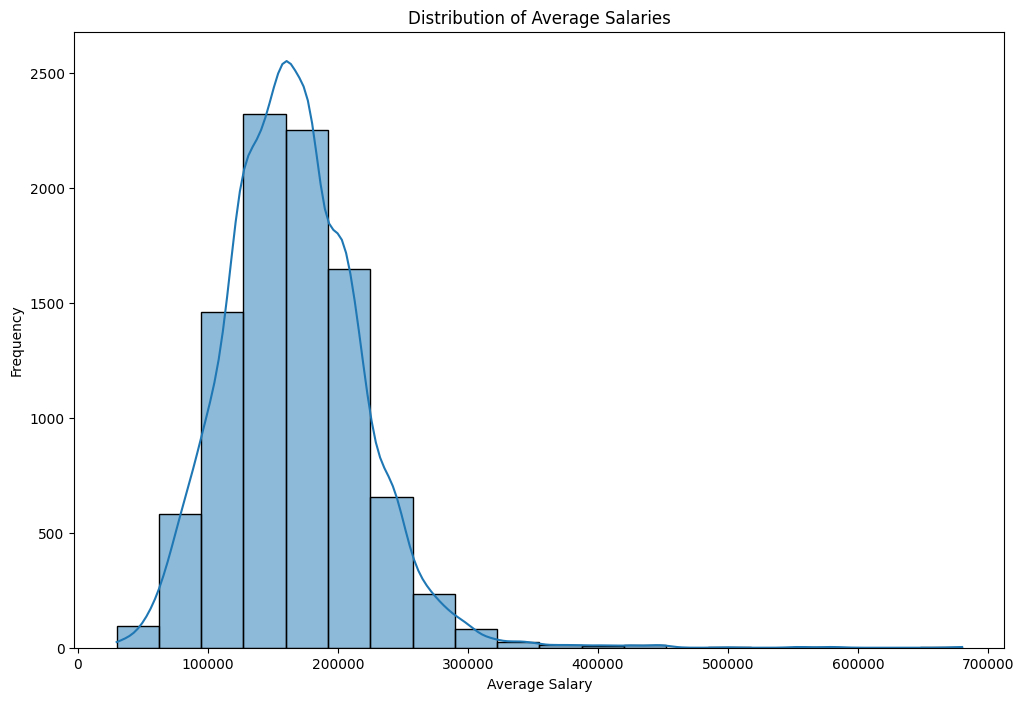

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Average_salary'], bins=20, kde=True)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

- Average salary by level, using `box plot` to detect outliers

Text(0, 0.5, 'Average Salary')

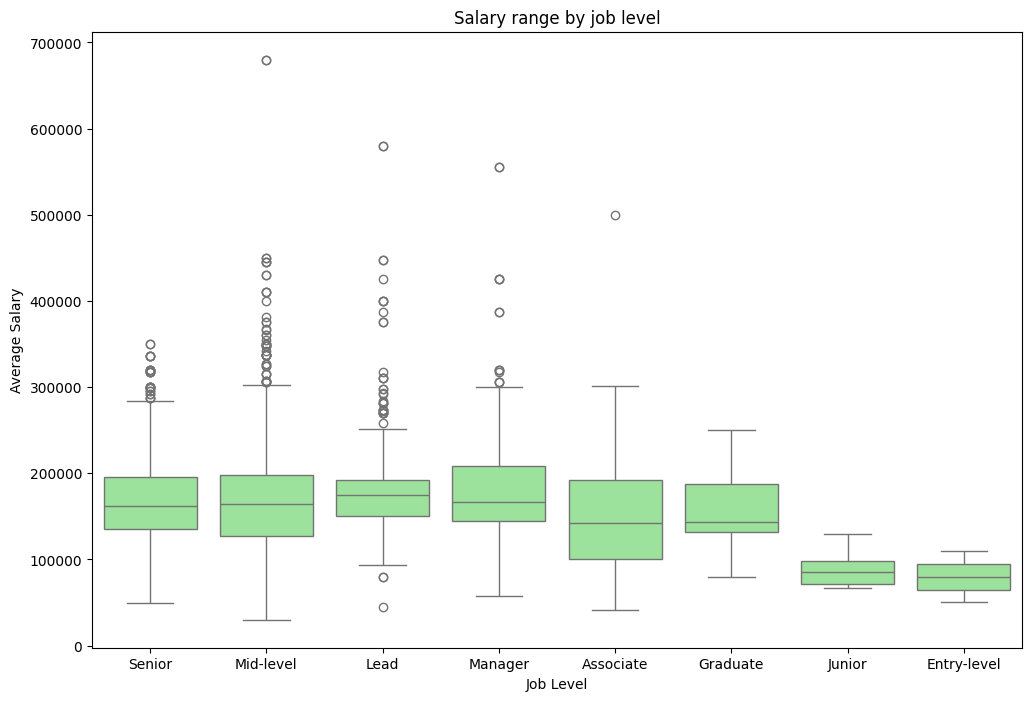

In [9]:
plt.figure(figsize=(12, 8))

sns.boxplot(x=df['Level'], y=df['Average_salary'], color ='lightgreen')
plt.title('Salary range by job level')
plt.xlabel('Job Level')
plt.ylabel('Average Salary')

- Average salary by work type

Text(0, 0.5, 'Average Salary')

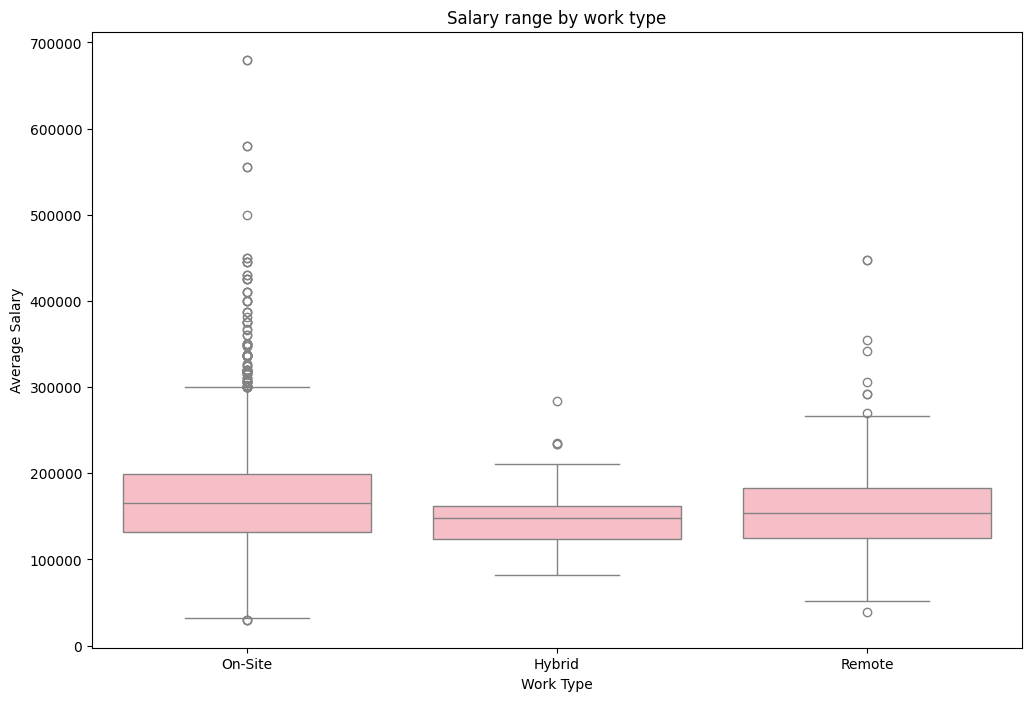

In [10]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = df['Working Mode'], y = df['Average_salary'], color = 'lightpink')
plt.title('Salary range by work type')
plt.xlabel('Work Type')
plt.ylabel('Average Salary')

- Average salary by job level and work type

Text(120.72222222222221, 0.5, 'Job level')

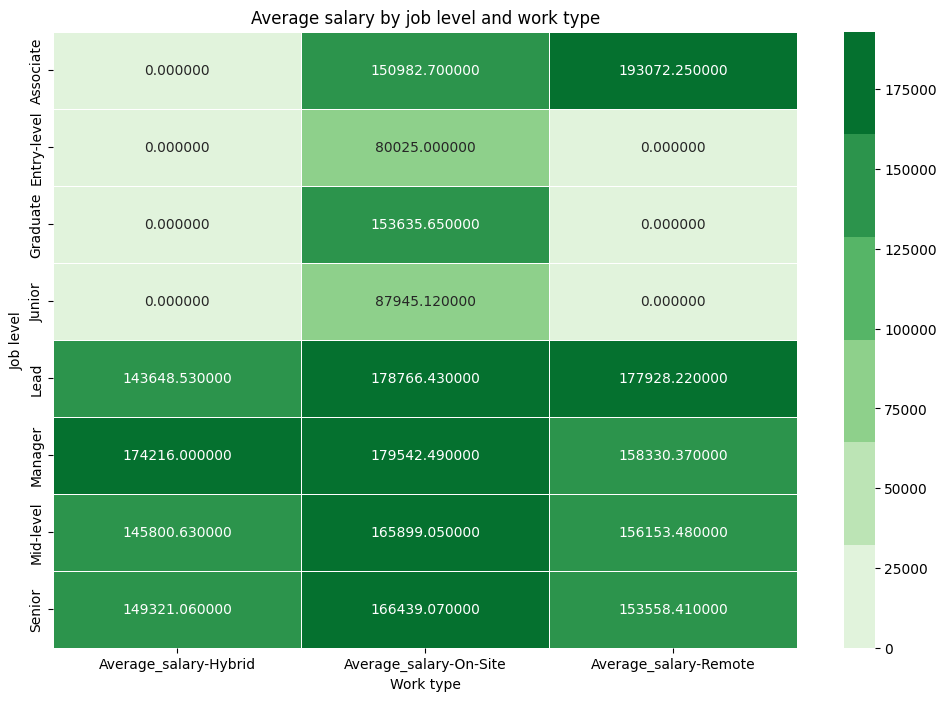

In [11]:
df1 = df[['Working Mode','Level','Average_salary']]
grouped = df1.groupby(['Working Mode','Level'],as_index=False).mean().round(2)
grouped_pivot = grouped.pivot(index = 'Level', columns = 'Working Mode').fillna(0)

# Plot the pivot
plt.figure(figsize=(12,8))
colormap = sns.color_palette("Greens") 
sns.heatmap(grouped_pivot, annot = True, fmt ="f", linewidths = 0.4, cmap=colormap)
plt.title('Average salary by job level and work type')
plt.xlabel('Work type')
plt.ylabel('Job level')

- Average salary for entry - level positions

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Booz Allen'),
  Text(1, 0, 'Bytedance'),
  Text(2, 0, 'Caci'),
  Text(3, 0, 'Dezign Concepts Llc'),
  Text(4, 0, 'Globalfoundries'),
  Text(5, 0, 'Leidos'),
  Text(6, 0, 'Missionboxsol'),
  Text(7, 0, 'New York University'),
  Text(8, 0, 'Nvidia'),
  Text(9, 0, 'Primus Global Services'),
  Text(10, 0, 'Sdv International'),
  Text(11, 0, 'Skybridge Aviation'),
  Text(12, 0, "St. Jude Children's Research Hospital"),
  Text(13, 0, 'Tiktok'),
  Text(14, 0, 'Transunion'),
  Text(15, 0, 'Uber'),
  Text(16, 0, 'Uc San Francisco Academic'),
  Text(17, 0, 'University Of California Berkeley'),
  Text(18, 0, 'Upen Group Inc')])

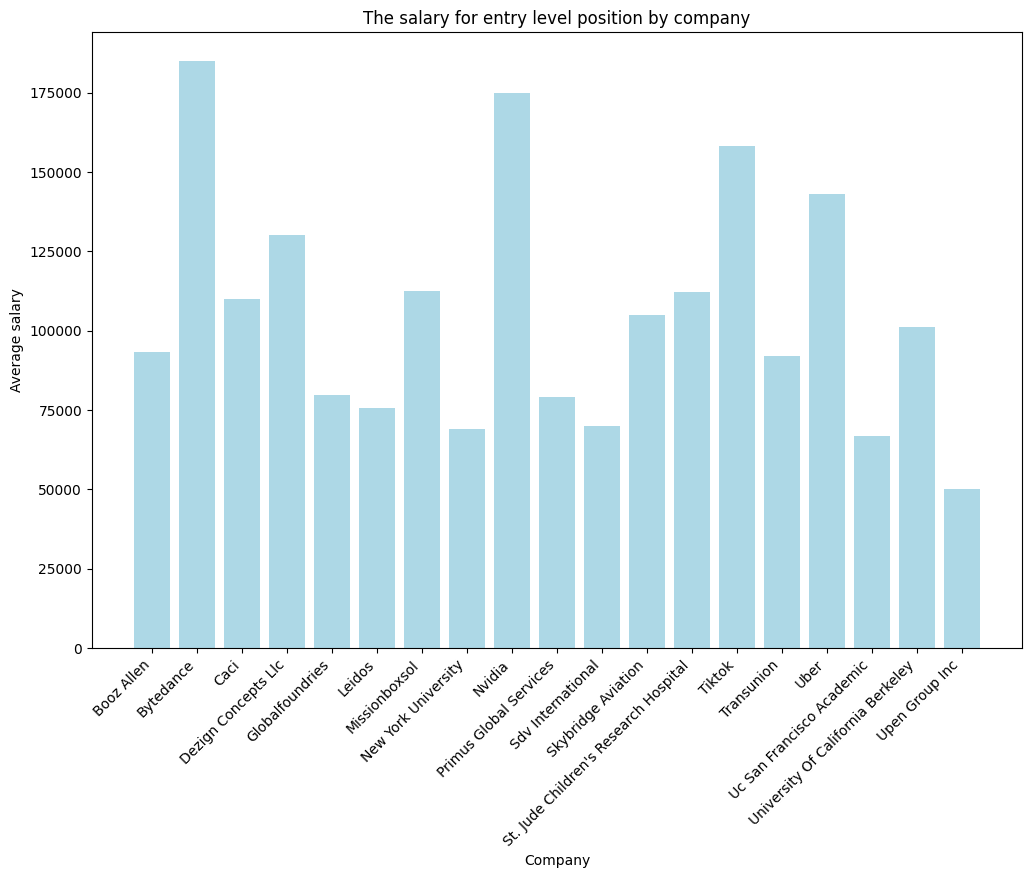

In [12]:
df2 = df[df['Level'].isin(['Entry-level', 'Graduate', 'Junior'])]

df_entry = df2.groupby('Company')['Average_salary'].mean().reset_index(name ='avg_sal')
plt.figure(figsize=(12,8))
plt.bar(df_entry['Company'], df_entry['avg_sal'], color = 'lightblue')
plt.title('The salary for entry level position by company')
plt.xlabel('Company')
plt.ylabel('Average salary')
plt.xticks(rotation = 45, ha ='right')

### Number of job posting insights

- `Plot` number of job postings over time

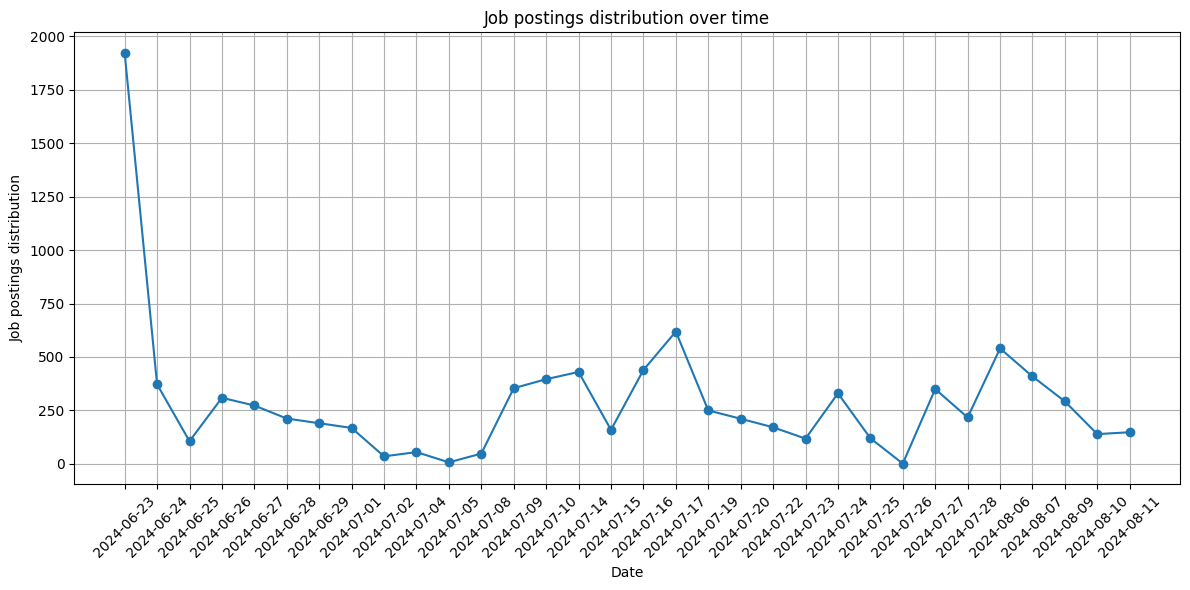

In [13]:
job_postings_count = df.groupby('Date').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(job_postings_count.index, job_postings_count.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Job postings distribution')
plt.title('Job postings distribution over time')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.grid(True) 

The highest number of job posting is starting from 22/06/2024, with the number approximately 1900 postings, then drop dramically in the next day and the postings remain stable within a range from 0 - 600 postings a days until 11/08/2024

- Count the number of postings for each weekday

In [14]:
# Generate new columns weekday 

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Weekday'] = df['Date'].dt.day_name()

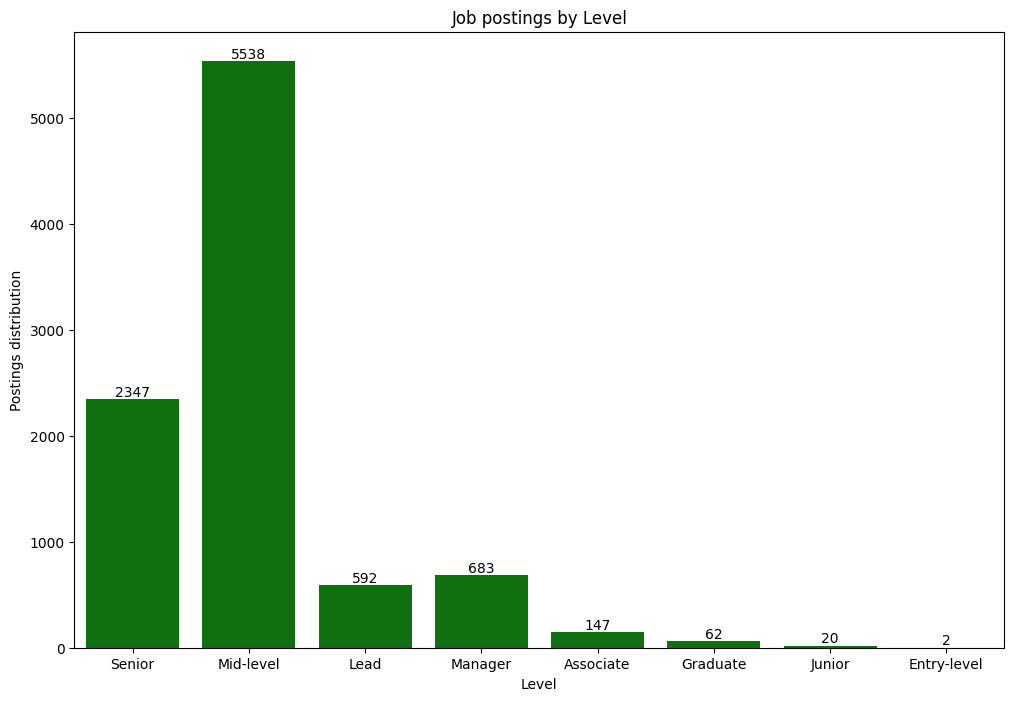

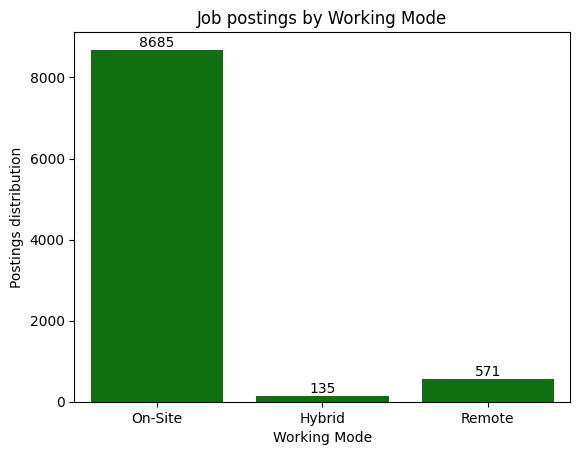

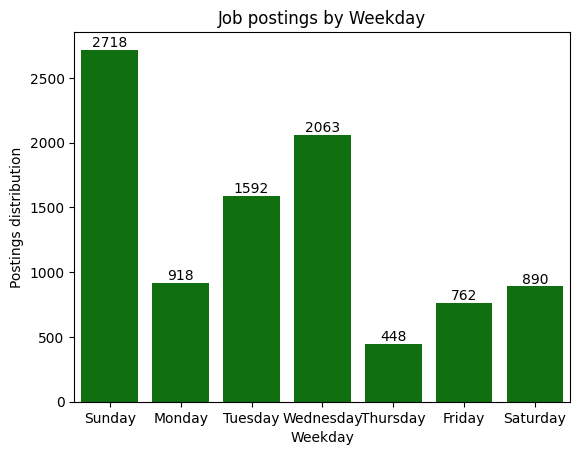

In [15]:
plt.figure(figsize=(12, 8))

for i in ['Level', 'Working Mode', 'Weekday']:
    ax = sns.countplot(x=df[i], color='green')
    ax.bar_label(ax.containers[0])
    plt.title(f'Job postings by {i}')
    plt.xlabel(i)
    plt.ylabel('Postings distribution')
    plt.show()

- The number of state hiring by job level

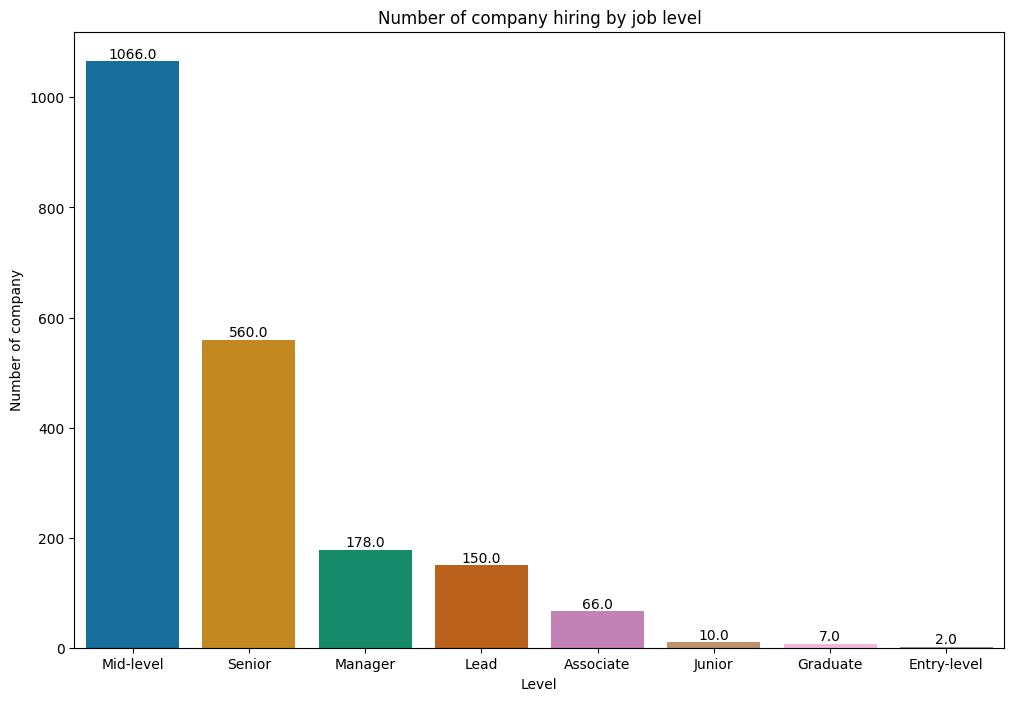

In [16]:
plt.figure(figsize=(12,8))

level_counts = df.groupby('Level')['Company'].nunique().sort_values(ascending = False).reset_index(name='Number_counts')

ax = sns.barplot(x= 'Level', y ='Number_counts', data = level_counts, palette='colorblind')
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: np.where(x > 0, x, ''), label_type='edge')
    plt.title('Number of company hiring by job level')
    plt.ylabel('Number of company')

- Work type by number of state

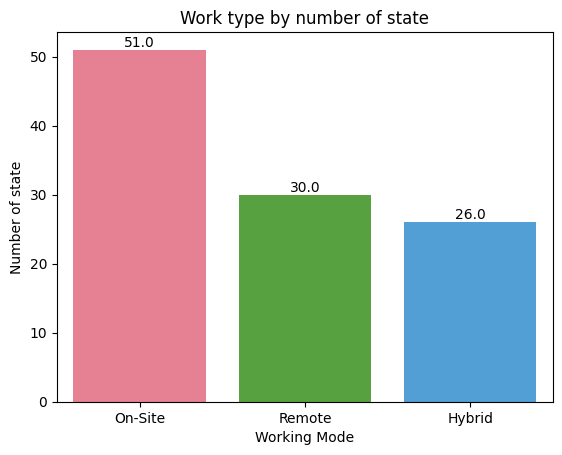

In [17]:
work_type= df.groupby('Working Mode')['State'].nunique().sort_values(ascending = False).reset_index(name='Number_counts')

ax1 = sns.barplot(x= 'Working Mode', y ='Number_counts', data = work_type, palette="husl")
for c in ax1.containers:
    ax1.bar_label(c, fmt=lambda x: np.where(x > 0, x, ''), label_type='edge')
    plt.title('Work type by number of state')
    plt.ylabel('Number of state')

Most of the company is hiring on-site working mode, there is only 30 and 26 state that hiring remote and hybrid position remote and hybrid working mode is around half of on-site

- Job level distribution across states

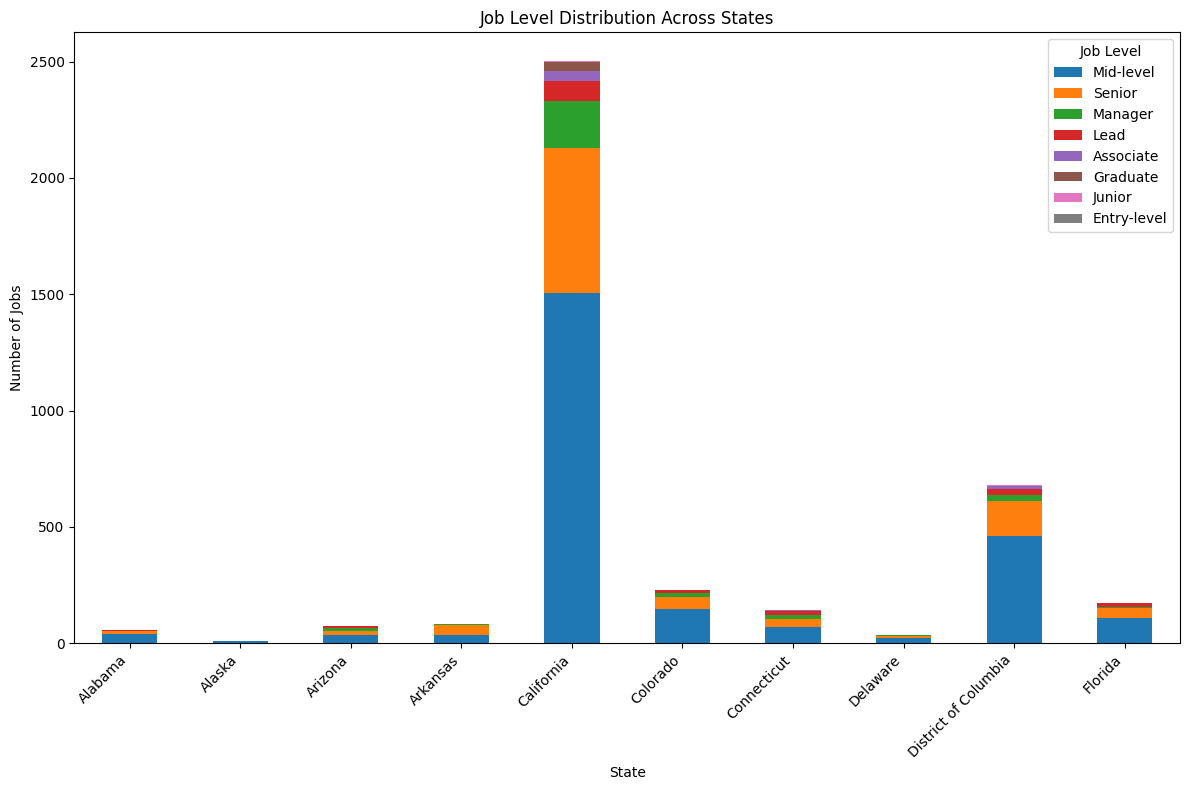

In [18]:
group = df.groupby(['State', 'Level']).size().unstack().fillna(0)
sorted_grouped = group.loc[:, group.sum().sort_values(ascending=False).index].head(10)

# Plot
sorted_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Job Level Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Level')
plt.tight_layout()

- Work type distribution by level

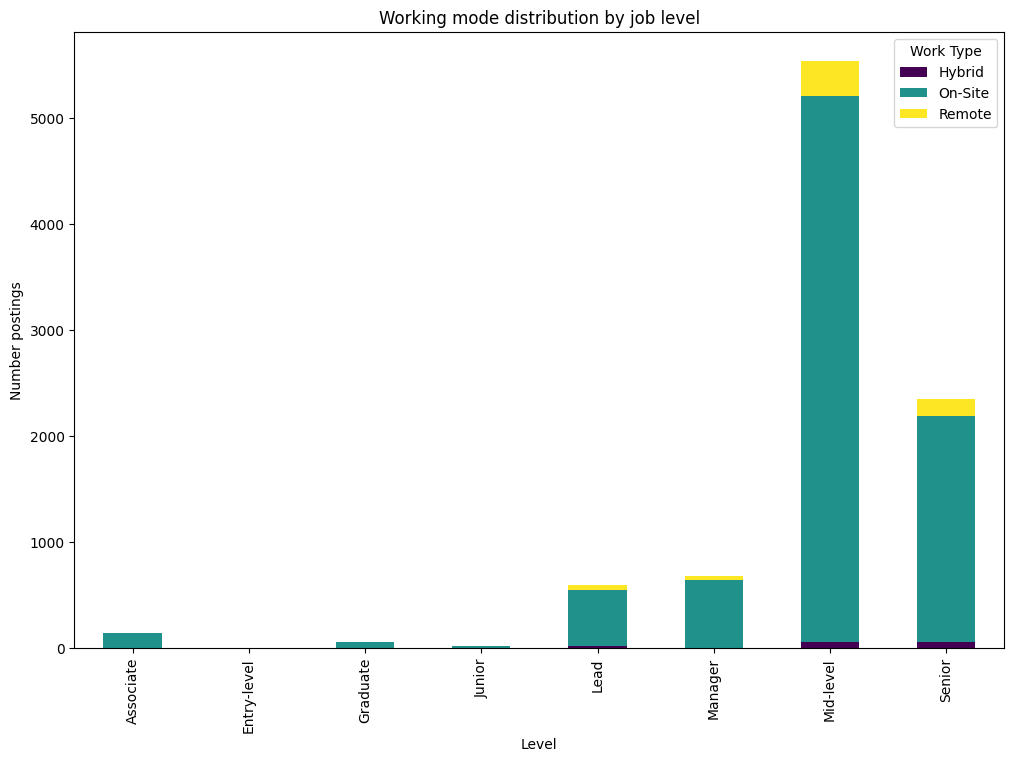

In [21]:
df_level = df.groupby(['Level', 'Working Mode']).size().unstack().fillna(0)

#Plot
df_level.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.xlabel('Level')
plt.ylabel('Number postings')
plt.title('Working mode distribution by job level')
plt.legend(title='Work Type')

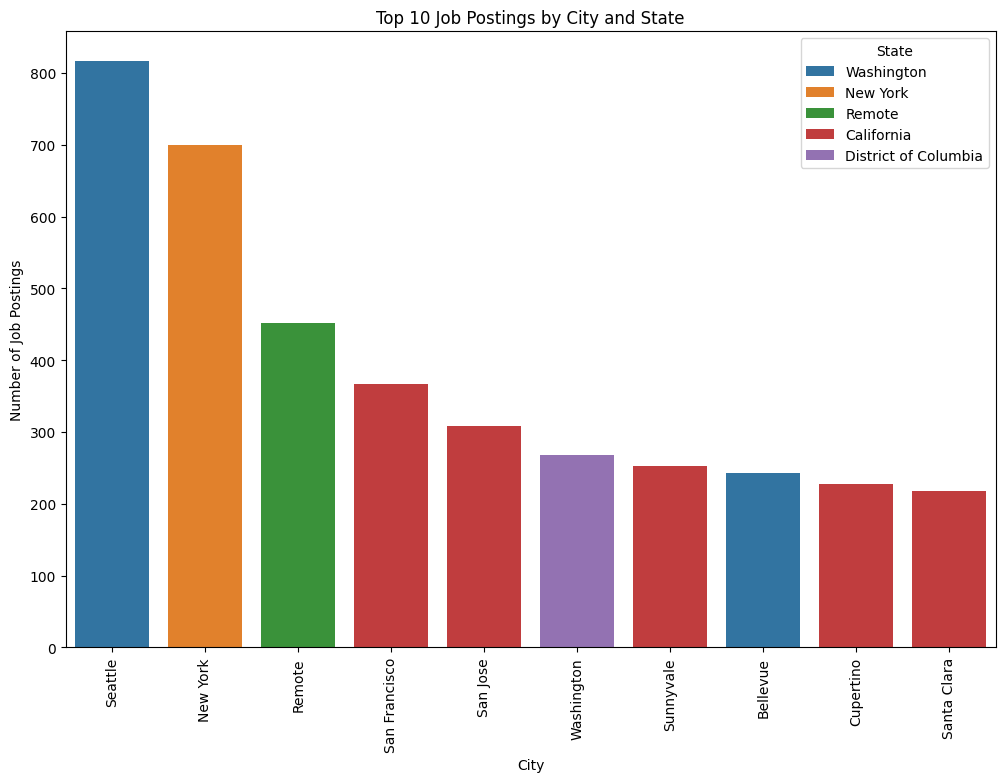

In [ ]:
group = df.groupby(['State', 'City'])['Level'].count().sort_values(ascending = False).head(10).reset_index(name = 'number of job postings')
plt.figure(figsize=(12, 8))

#Plot
sns.barplot(x='City', y='number of job postings', hue='State', data=group)

plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.title('Top 10 Job Postings by City and State')
plt.legend(title='State')

- Top 10 company that actively hiring

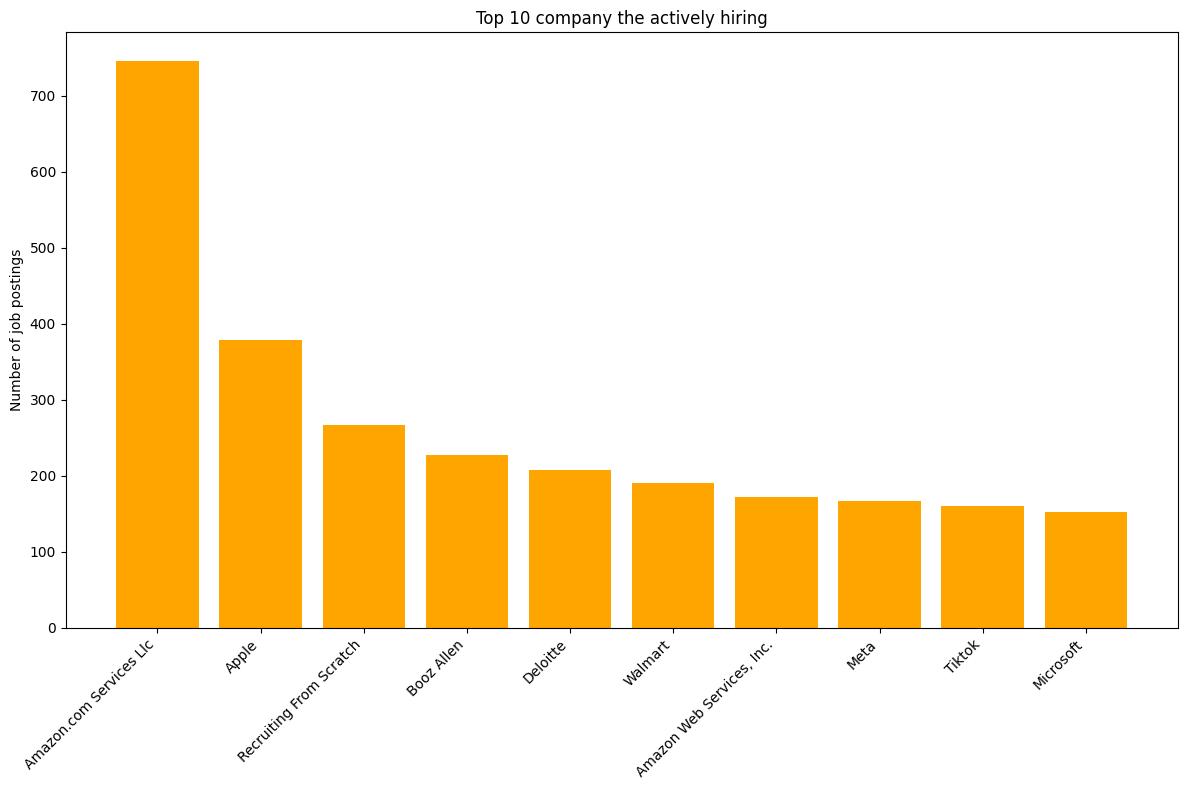

In [ ]:
df_company = df.groupby('Company')['Level'].count(). sort_values(ascending = False).reset_index(name='frequency')

#Plot
plt.figure(figsize=(12, 8))
df_company = df_company.head(10)
plt.bar(df_company['Company'], df_company['frequency'], color = 'orange')
plt.title('Top 10 company the actively hiring')
plt.ylabel('Number of job postings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


- Top 10 highest job posting distribution across states

Text(0.5, 1.0, 'Propotion of job postings by State ')

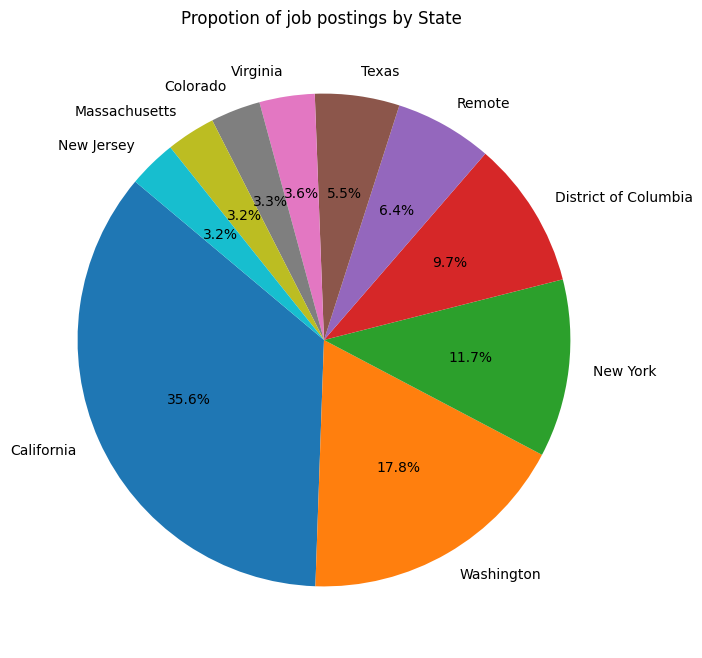

In [ ]:
df_state = df.groupby('State')['Average_salary'].count().sort_values(ascending = False).reset_index(name = 'number of posting').head(10)

#Plot
plt.figure(figsize=(8, 8))
plt.pie(df_state['number of posting'], labels=df_state['State'], autopct='%1.1f%%', startangle=140)
plt.title('Propotion of job postings by State ')